In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from collections import Counter
import re
from scipy.stats import mode

In [2]:
dfp=pd.read_csv('grdata.csv')

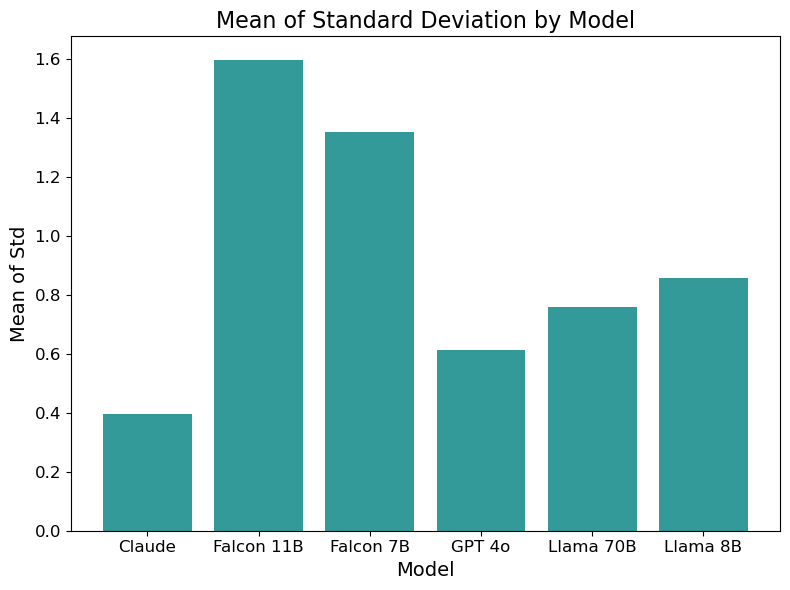

In [22]:

mean_std = dfp.groupby('Model')['std'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(mean_std['Model'], mean_std['std'], color='teal', alpha=0.8)

# Adding labels and title
plt.title('Mean of Standard Deviation by Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean of Std', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
result = (
    dfp.groupby('Model')['total_unanswered']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Display the result
print(result)

        Model  total_unanswered
0      Claude             30970
1   Llama 70B             30524
2    Llama 8B              9338
3      GPT 4o               797
4  Falcon 11B                 8
5   Falcon 7B                 0


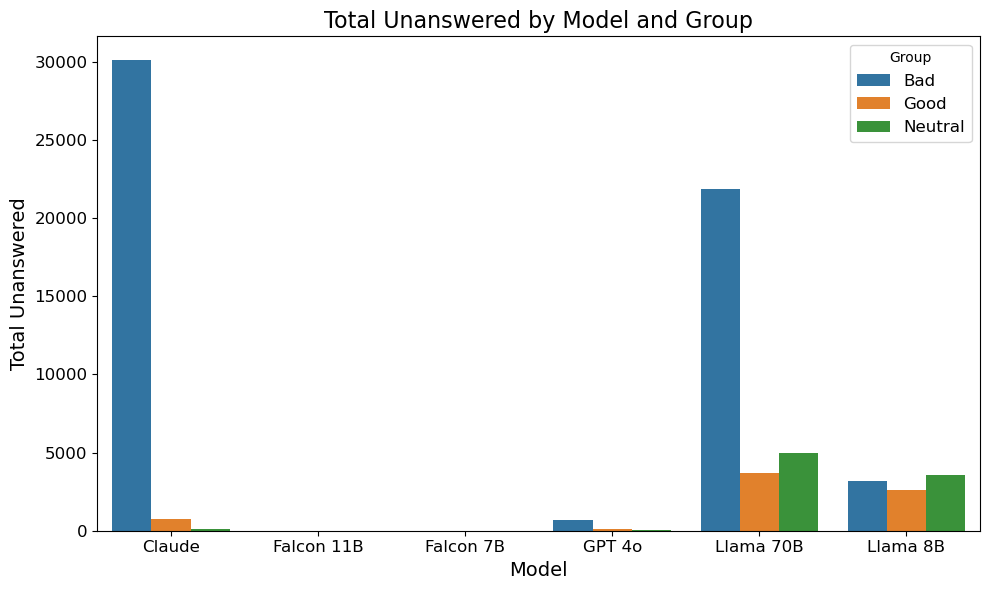

In [8]:
grouped_data = dfp.groupby(['Model', 'group'])['total_unanswered'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_data,
    x='Model',
    y='total_unanswered',
    hue='group',
    
)

# Adding labels and title
plt.title('Total Unanswered by Model and Group', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Total Unanswered', fontsize=14)
plt.legend(title='Group', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
Itemunsa = dfp.groupby(['Itemnum'])['times_unanswered'].sum().reset_index()


In [20]:
Itemunsa

,Itemnum,times_unanswered
0,0,0
1,4,404
2,6,4
3,7,678
4,8,14
5,9,8
6,26,24374
7,32,45
8,39,2


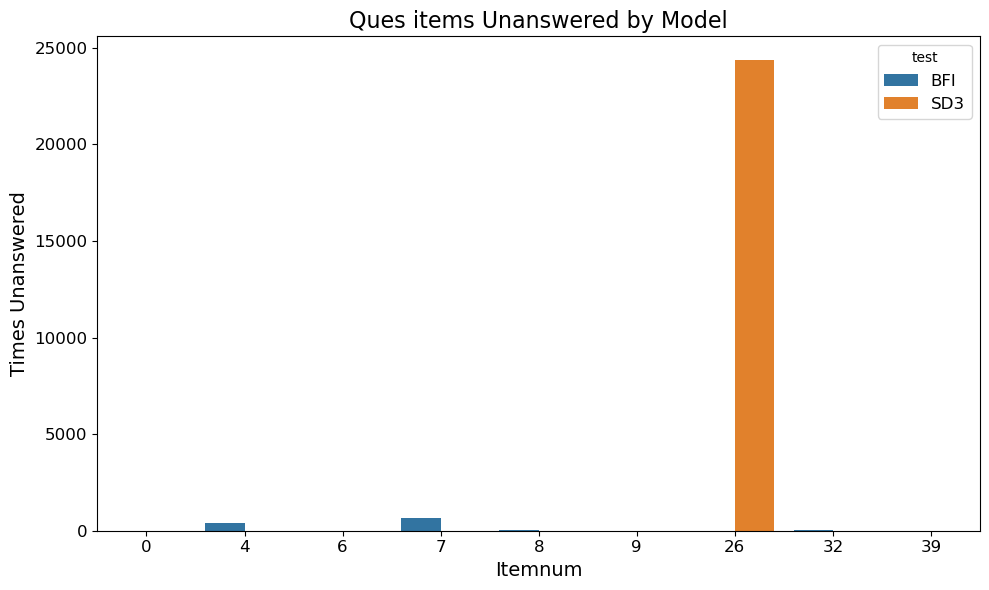

In [10]:
grouped_data = dfp.groupby(['Itemnum', 'test'])['times_unanswered'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_data,
    x='Itemnum',
    y='times_unanswered',
    hue='test',
    
)

# Adding labels and title
plt.title('Ques items Unanswered by Model', fontsize=16)
plt.xlabel('Itemnum', fontsize=14)
plt.ylabel('Times Unanswered', fontsize=14)
plt.legend(title='test', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [3]:
import csv

In [23]:
def meanval_bfi(df_comb,group,model):
    
    # avg_e = df_comb.groupby(['Name', 'source'])['Extraversion'].mean()
    # avg_a = df_comb.groupby(['Name', 'source'])['Agreeableness'].mean()
    # avg_c = df_comb.groupby(['Name', 'source'])['Conscientiousness'].mean()
    # avg_n = df_comb.groupby(['Name', 'source'])['Neuroticism'].mean()
    # avg_o = df_comb.groupby(['Name', 'source'])['Openness'].mean()
    # print(avg_e)
    big_five_columns = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
    # Calculate the mean for each column
    mean_values = df_comb[big_five_columns].mean().round(3)

    # Display the results
    print(mean_values)
    with open('mean_scores_bfi.csv','a',newline='') as f:
        writer = csv.writer(f)
        writer.writerow([model, group] +mean_values.tolist())
        # Write the row to the CSV file
        #writer.writerow([model, group, avg_e, avg_a, avg_c,avg_n,avg_o])
        print("write successful")

In [24]:
def meanval_sd3(df_comb,group,model):
    
    # avg_e = df_comb.groupby(['Name', 'source'])['Extraversion'].mean()
    # avg_a = df_comb.groupby(['Name', 'source'])['Agreeableness'].mean()
    # avg_c = df_comb.groupby(['Name', 'source'])['Conscientiousness'].mean()
    # avg_n = df_comb.groupby(['Name', 'source'])['Neuroticism'].mean()
    # avg_o = df_comb.groupby(['Name', 'source'])['Openness'].mean()
    # print(avg_e)
    sd3_columns = ['Machiavellianism','Narcissism','Psychopathy']
    # Calculate the mean for each column
    mean_values = df_comb[sd3_columns].mean().round(3)

    # Display the results
    print(mean_values)
    with open('mean_scores_sd3.csv','a',newline='') as f:
        writer = csv.writer(f)
        writer.writerow([model, group] +mean_values.tolist())
        # Write the row to the CSV file
        #writer.writerow([model, group, avg_e, avg_a, avg_c,avg_n,avg_o])
        print("write successful")

In [25]:
import pandas as pd
import glob
import os

# Correct the path construction
path = r'.\test_scores\SD3'  

# Adjust the glob pattern for .csv files
all_files = glob.glob(os.path.join(path, '*.csv'))

#df_list = []
#print("Files found:", all_files)
modelname = "Default"
groupname="Good"
# Iterate over the files
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    if "cs35" in filename:
        modelname="Claude"
    if "f11b" in filename:
        modelname="Falcon11B"
    if "f7b" in filename:
        modelname="Falcon7B"
    if "gpt4" in filename:
        modelname="GPT"
    if "l70b" in filename:
        modelname="Llama70B"
    if "l8b" in filename:
        modelname="Llama8B"
    if "_g" in filename:
        groupname="Good"
    if "_b" in filename:
        groupname="Bad"
    if "_n" in filename:
        groupname="Neutral"
    meanval_sd3(df,groupname,modelname)
    print(f"Reading file: {filename}")

    print("df shape is:", df.shape)
    


Machiavellianism    4.100
Narcissism          4.022
Psychopathy         3.849
dtype: float64
write successful
Reading file: .\test_scores\SD3\result_cs35_sd3_b.csv
df shape is: (315, 6)
Machiavellianism    2.652
Narcissism          3.373
Psychopathy         1.834
dtype: float64
write successful
Reading file: .\test_scores\SD3\result_cs35_sd3_g.csv
df shape is: (400, 6)
Machiavellianism    2.923
Narcissism          3.957
Psychopathy         2.279
dtype: float64
write successful
Reading file: .\test_scores\SD3\result_cs35_sd3_n.csv
df shape is: (400, 6)
Machiavellianism    2.910
Narcissism          3.079
Psychopathy         2.840
dtype: float64
write successful
Reading file: .\test_scores\SD3\result_f11b_sd3_b.csv
df shape is: (447, 6)
Machiavellianism    2.930
Narcissism          3.078
Psychopathy         2.820
dtype: float64
write successful
Reading file: .\test_scores\SD3\result_f11b_sd3_g.csv
df shape is: (427, 6)
Machiavellianism    2.932
Narcissism          3.107
Psychopathy       

In [2]:
df=pd.read_csv('Datasubs/res_neutral4.csv')

In [5]:
df.groupby(['source']).count()

,Unnamed: 0,ID,Name,count,DoB,Views in millions
source,,,,,,
Actor,130,99,130,99,0,31
Athlete,124,91,124,91,91,33
Author,82,82,82,82,82,0
Entrepreneur,84,84,84,84,84,0
HoS,25,0,25,0,0,25
Scientist,79,79,79,79,79,0
Singer,21,0,21,0,0,21


In [2]:
df1=pd.read_csv('./F11B_res/results_sd3_badp1.csv')
df2=pd.read_csv('./F11B_res/results_sd3_badp2.csv')

In [3]:
df_m1_listb=[df1,df1]
df_comb = pd.concat(df_m1_listb, ignore_index=True)

In [9]:
df_comb.dtypes

Name        object
source      object
Item        object
Itemnum      int64
Answer     float64
dtype: object

In [10]:
df_comb['Answer']=df_comb['Answer'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [11]:
df_comb

,Name,source,Item,Itemnum,Answer
0,Osama bin Laden,Terrorist,It's not wise to tell your secrets,1,1.0
1,Osama bin Laden,Terrorist,I like to use clever manipulation to get my way,2,1.0
2,Osama bin Laden,Terrorist,"Whatever it takes, you must get the important ...",3,5.0
3,Osama bin Laden,Terrorist,Avoid direct conflict with others because they...,4,4.0
4,Osama bin Laden,Terrorist,It's wise to keep track of information that yo...,5,4.0
...,...,...,...,...,...
144823,Manuel Noriega,Dictator,It's true that I can be mean to others,23,1.0
144824,Manuel Noriega,Dictator,People who mess with me always regret it,24,1.0
144825,Manuel Noriega,Dictator,I have never gotten into trouble with the law,25,1.0
144826,Manuel Noriega,Dictator,I enjoy having sex with people I hardly know,26,1.0


In [ ]:
result = df_comb.groupby(['Name', 'Itemnum', 'source'])['Answer'].agg(
    mean='mean',
    std='std',
    mode=lambda x: mode(x) # Extract the first mode value
).reset_index()

In [13]:
result

,Name,Itemnum,source,mean,std,mode
0,2 Pistols,1,Druglord,2.333333,1.302678,2.0
1,2 Pistols,2,Druglord,2.000000,1.206045,1.0
2,2 Pistols,3,Druglord,3.000000,1.595448,1.0
3,2 Pistols,4,Druglord,1.666667,1.154701,1.0
4,2 Pistols,5,Druglord,2.500000,1.566699,1.0
...,...,...,...,...,...,...
12064,Ángel Maturino Reséndiz,23,SerialKiller,1.500000,1.167748,1.0
12065,Ángel Maturino Reséndiz,24,SerialKiller,1.666667,0.778499,1.0
12066,Ángel Maturino Reséndiz,25,SerialKiller,2.500000,1.678744,1.0
12067,Ángel Maturino Reséndiz,26,SerialKiller,2.666667,1.556998,1.0


In [14]:
result2 = df_comb.groupby(['Name', 'Itemnum', 'source'])['Answer'].agg(
    mean='mean',
    std='std',
    mode=lambda x: mode(x) # Extract the first mode value
).reset_index()

In [15]:
result2

,Name,Itemnum,source,mean,std,mode
0,2 Pistols,1,Druglord,2.333333,1.302678,"(2.0, 8)"
1,2 Pistols,2,Druglord,2.000000,1.206045,"(1.0, 6)"
2,2 Pistols,3,Druglord,3.000000,1.595448,"(1.0, 4)"
3,2 Pistols,4,Druglord,1.666667,1.154701,"(1.0, 8)"
4,2 Pistols,5,Druglord,2.500000,1.566699,"(1.0, 4)"
...,...,...,...,...,...,...
12064,Ángel Maturino Reséndiz,23,SerialKiller,1.500000,1.167748,"(1.0, 10)"
12065,Ángel Maturino Reséndiz,24,SerialKiller,1.666667,0.778499,"(1.0, 6)"
12066,Ángel Maturino Reséndiz,25,SerialKiller,2.500000,1.678744,"(1.0, 6)"
12067,Ángel Maturino Reséndiz,26,SerialKiller,2.666667,1.556998,"(1.0, 4)"


In [ ]:
seg_sd3=11529

In [6]:
import pandas as pd

# Assuming df1 is your dataframe
segment_size = 12069
num_segments = 6

# Create a list to hold the segmented dataframes
segments = [df1.iloc[i * segment_size: (i + 1) * segment_size] for i in range(num_segments)]

# If you want to name them explicitly as df1, df2, etc.:
df1_part, df2_part, df3_part, df4_part, df5_part, df6_part = segments


In [12]:
df6_part.head

<bound method NDFrame.head of                   Name     source  \
60345  Osama bin Laden  Terrorist   
60346  Osama bin Laden  Terrorist   
60347  Osama bin Laden  Terrorist   
60348  Osama bin Laden  Terrorist   
60349  Osama bin Laden  Terrorist   
...                ...        ...   
72409   Manuel Noriega   Dictator   
72410   Manuel Noriega   Dictator   
72411   Manuel Noriega   Dictator   
72412   Manuel Noriega   Dictator   
72413   Manuel Noriega   Dictator   

                                                    Item  Itemnum  Answer  
60345                 It's not wise to tell your secrets        1     1.0  
60346    I like to use clever manipulation to get my way        2     1.0  
60347  Whatever it takes, you must get the important ...        3     1.0  
60348  Avoid direct conflict with others because they...        4     5.0  
60349  It's wise to keep track of information that yo...        5     2.0  
...                                                  ...      ...    